In [224]:
cellpose_seg0 = r"output\test\2D_patch_test_0_seg.npy"
cellpose_seg1 = r"output\test\2D_patch_test_1_seg.npy"


In [225]:
import numpy as np
from cellpose import plot, utils, io, models
import matplotlib.pyplot as plt
from skimage.draw import polygon

# Load the segmentation mask
dat_0 = np.load(cellpose_seg0, allow_pickle=True).item()
# Extract the masks and generate outlines
masks_0 = dat_0['masks']
outlines_0 = utils.outlines_list(masks_0) # multiprocessing_threshold=1000



Multiprocessing is disabled for Windows


In [227]:
# Create a blank binary image to fill in the cells
filled_image_0 = np.zeros_like(masks_0, dtype=np.uint8)  # Start with black (0)

# Fill each outline's interior as white
for outline in outlines_0:
    # Ensure the outline coordinates are in integer format
    outline = np.array(outline, dtype=np.int32)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_0.shape)
    filled_image_0[rr, cc] = 255  # Fill with white (255) inside each contour

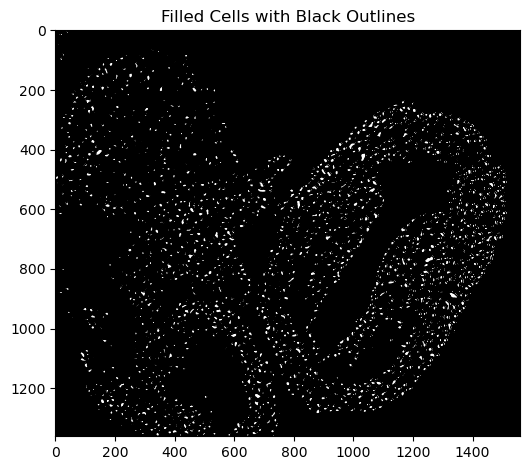

In [228]:
# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(filled_image_0, cmap='gray', interpolation='none')
for outline in outlines_0:
    plt.plot(outline[:, 0], outline[:, 1], color='black', linewidth   =1)  # Add black outlines on top

ax.set_title("Filled Cells with Black Outlines")
ax.axis('on')
plt.show()

In [229]:
# Load the segmentation mask
dat_1 = np.load(cellpose_seg1, allow_pickle=True).item()
# Extract the masks and generate outlines
masks_1 = dat_1['masks']
outlines_1 = utils.outlines_list(masks_1) # multiprocessing_threshold=1000

Multiprocessing is disabled for Windows


In [230]:
# Create a blank binary image to fill in the cells
filled_image_1 = np.zeros_like(masks_1, dtype=np.uint8)  # Start with black (0)

# Fill each outline's interior as white
for outline in outlines_1:
    # Ensure the outline coordinates are in integer format
    outline = np.array(outline, dtype=np.int32)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_1.shape)
    filled_image_1[rr, cc] = 255  # Fill with white (255) inside each contour

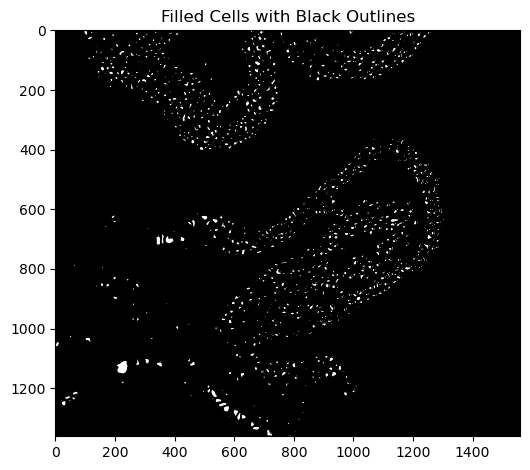

In [231]:
# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(filled_image_1, cmap='gray', interpolation='none')
for outline in outlines_1:
    plt.plot(outline[:, 0], outline[:, 1], color='black', linewidth=1)  # Add black outlines on top

ax.set_title("Filled Cells with Black Outlines")
ax.axis('on')
plt.show()

In [232]:
# Define the shape of the new mask
mask_shape = (2478, 1560)

# Create a zero-filled mask
filled_image_new = np.zeros(mask_shape, dtype=np.uint8) 

# Define adjusted main segment coordinates
segments = [
    (0, 1362, 0, 1560),   # Segment 0
    (1116, 2478, 0, 1560) # Segment 1
]

# Offsets for each segment
offsets = [
    (0, 0),               # No offset for Segment 0
    (1116, 0)             # Offset for Segment 1 (row offset, column offset)
]

# New outline list
new_outlines = []

# Fill each outline's interior as white
for outline in outlines_0:
    # Add [1116, 0] to each coordinate in the outline
    outline = np.array(outline, dtype=np.int32) + np.array([0, 0], dtype=np.int32)
    new_outlines.append(outline)

    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_new.shape)
    filled_image_new[rr, cc] = 155  # Fill with white (255) inside each contour

# Fill each outline's interior as white
for outline in outlines_1:
    # Add [1116, 0] to each coordinate in the outline
    outline = np.array(outline, dtype=np.int32) + np.array([0, 1116], dtype=np.int32)
    new_outlines.append(outline)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_new.shape)
    filled_image_new[rr, cc] = 255  # Fill with white (255) inside each contour

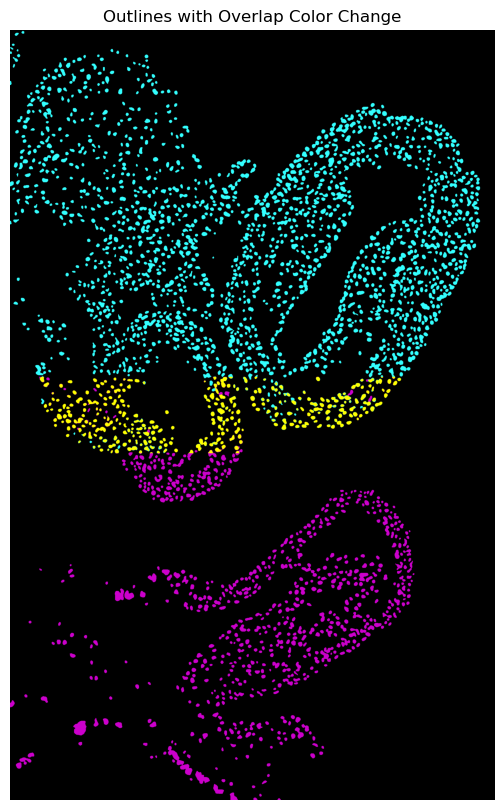

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import polygon

# Assuming `filled_image_new` is a grayscale image (2D array)
# Create a colored image (3 channels for RGB)
colored_image = np.zeros((*filled_image_new.shape, 3), dtype=np.float32)

# List to store modified outlines
new_outlines = []

# Function to add alpha blending
def apply_alpha(image, rr, cc, color, alpha):
    for i in range(3):  # Apply for each color channel
        image[rr, cc, i] = (1 - alpha) * image[rr, cc, i] + alpha * color[i]

# Process outlines_0 with cyan
for outline in outlines_0:
    # Adjust outline coordinates
    outline = np.array(outline, dtype=np.int32) + np.array([0, 0], dtype=np.int32)
    new_outlines.append(outline)

    # Fill the interior
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_new.shape)
    colored_image[rr, cc] = [1.0, 1.0, 1.0]  # Fill interior as white (normalized to 1.0)

    # Apply cyan outline with alpha
    apply_alpha(colored_image, rr, cc, color=[0, 1.0, 1.0], alpha=0.8)  # Cyan

adjusted_outlines_1 = []
# Process outlines_1 with magenta
for outline in outlines_1:
    # Adjust outline coordinates
    outline = np.array(outline, dtype=np.int32) + np.array([0, 1116], dtype=np.int32)
    adjusted_outlines_1.append(outline)
    new_outlines.append(outline)

    # Fill the interior
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_new.shape)
    
    # For overlapping areas, mix the colors
    overlap_mask = (colored_image[rr, cc] != 0).any(axis=-1)
    colored_image[rr[overlap_mask], cc[overlap_mask]] = [1.0, 1.0, 0.0]  # Yellow for overlap (cyan + magenta)
    
    # For non-overlapping areas, apply magenta
    apply_alpha(colored_image, rr[~overlap_mask], cc[~overlap_mask], color=[1.0, 0, 1.0], alpha=0.8)  # Magenta

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(colored_image)
plt.axis('off')
plt.title("Outlines with Overlap Color Change")
plt.show()



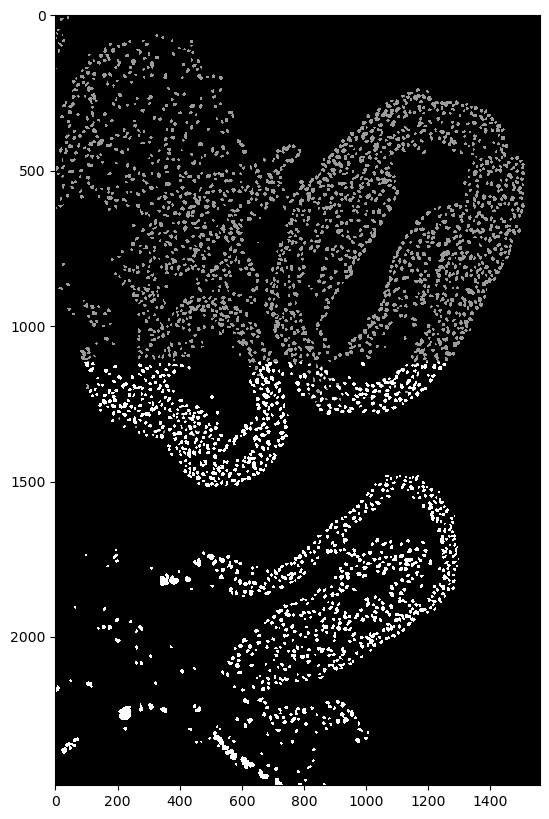

In [264]:
# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(filled_image_new, cmap='gray', interpolation='none')

In [266]:
def calculate_overlap(segments):
    """
    Calculates the overlap region of segmentation and returns the coordinates.

    Parameters:
        segments (list of tuples): List of segment boundaries in the form
                                   (y_start, y_end, x_start, x_end).

    Returns:
        tuple: Overlap region as (y_start, y_end, x_start, x_end), or None if no overlap exists.
    """
    if len(segments) < 2:
        raise ValueError("At least two segments are required to calculate overlap.")

    # Extract boundaries for the two segments
    y_start1, y_end1, x_start1, x_end1 = segments[0]
    y_start2, y_end2, x_start2, x_end2 = segments[1]

    # Calculate overlap boundaries
    y_start_overlap = max(y_start1, y_start2)
    y_end_overlap = min(y_end1, y_end2)
    x_start_overlap = max(x_start1, x_start2)
    x_end_overlap = min(x_end1, x_end2)

    # Check if there is an actual overlap
    if y_start_overlap < y_end_overlap and x_start_overlap < x_end_overlap:
        return (y_start_overlap, y_end_overlap, x_start_overlap, x_end_overlap)
    else:
        return None  # No overlap exists


In [237]:
# Define segment boundaries
segments = [
    (0, 1362, 0, 1560),   # Segment 0
    (1116, 2478, 0, 1560) # Segment 1
]

# Calculate the overlap region
overlap_region = calculate_overlap(segments)

if overlap_region:
    print(f"Overlap region coordinates: {overlap_region}")
else:
    print("No overlap exists.")


Overlap region coordinates: (1116, 1362, 0, 1560)


In [293]:
def calculate_central_line(x1, x2, y1, y2):
    # Calculate the center point
    x_center = (x1 + x2) / 2
    y_center = (y1 + y2) / 2

        
    # Return results
    return {
        "center": (x_center, y_center),
        "vertical_line_x": x_center,
        "horizontal_line_y": y_center,
        
    }


# Example usage
coordinates = overlap_region
result = calculate_central_line(*coordinates)

# Print the results
print(f"Center: {result['center']}")
print(f"Vertical Line (x): {result['vertical_line_x']}")
print(f"Horizontal Line (y): {result['horizontal_line_y']}")



Center: (1239.0, 780.0)
Vertical Line (x): 1239.0
Horizontal Line (y): 780.0


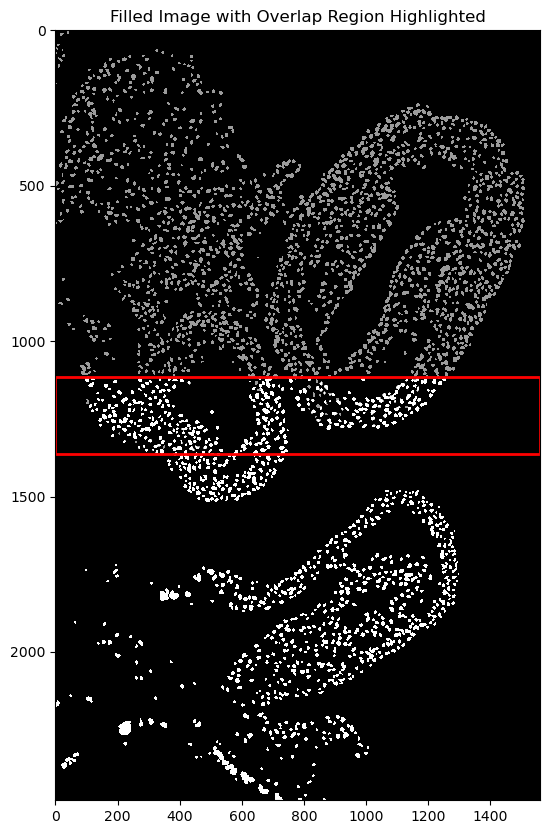

In [239]:
import matplotlib.patches as patches

# Plot the filled binary image with the overlap rectangle
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(filled_image_new, cmap='gray', interpolation='none')

if overlap_region:
    y_start, y_end, x_start, x_end = overlap_region
    # Draw the overlap rectangle
    rect = patches.Rectangle(
        (x_start, y_start),  # Bottom-left corner
        x_end - x_start,     # Width
        y_end - y_start,     # Height
        linewidth=2,
        edgecolor='red',
        facecolor='none'     # Transparent fill
    )
    ax.add_patch(rect)

# Add labels and display the figure
ax.set_title("Filled Image with Overlap Region Highlighted")
plt.show()


In [240]:
import pandas as pd

def boundaries_to_table(boundaries):
    # Create an empty list to store data rows
    data = []
    
    # Loop through each boundary (each cell)
    for cell_id, boundary in enumerate(boundaries, start=1):
        # Loop through each point in the boundary
        for point in boundary:
            # Append cell_id, x, y to the data list
            data.append([cell_id, point[0], point[1]])
    
    # Create a DataFrame with the data
    df = pd.DataFrame(data, columns=['cell_id', 'vertex_x', 'vertex_y'])
    
    return df

In [241]:
# Convert boundaries to table
df_outlines_list_0 = boundaries_to_table(outlines_0)
df_outlines_list_0

,cell_id,vertex_x,vertex_y
0,1,40,3
1,1,39,4
2,1,38,5
3,1,37,6
4,1,37,7
...,...,...,...
67291,2035,457,1359
67292,2035,456,1359
67293,2035,455,1359
67294,2035,454,1359


In [268]:
# Convert boundaries to table
df_outlines_list_1 = boundaries_to_table(adjusted_outlines_1)
df_outlines_list_1

,cell_id,vertex_x,vertex_y
0,1,93,1116
1,1,93,1117
2,1,94,1118
3,1,95,1119
4,1,95,1120
...,...,...,...
36174,1087,869,2475
36175,1087,868,2474
36176,1087,867,2473
36177,1087,866,2472


In [269]:
def reduce_points(df):
    # Group by cell_id and get counts
    cell_counts = df.groupby('cell_id').size()
    
    new_df = pd.DataFrame()
    
    for cell_id in cell_counts.index:
        cell_data = df[df['cell_id'] == cell_id]
        
        if cell_counts[cell_id] > 50:
            # Keep every other row until we have 50 points
            reduced_data = cell_data.iloc[::2].head(50)
        elif 30 < cell_counts[cell_id] <= 50:
            # Keep every other row until we have 30 points
            reduced_data = cell_data.iloc[::2].head(30)
        else:
            # Keep all points if count <= 30
            reduced_data = cell_data
            
        new_df = pd.concat([new_df, reduced_data])
    
    return new_df.reset_index(drop=True)

In [270]:
# Apply the function
reduced_outlines_list_0 = reduce_points(df_outlines_list_0)
reduced_outlines_list_1 = reduce_points(df_outlines_list_1)

# Print the results
print("Original shape 0:", df_outlines_list_0.shape)
print("Reduced shape 0:", reduced_outlines_list_0.shape)

# Print the results
print("Original shape 1:", df_outlines_list_1.shape)
print("Reduced shape 1:", reduced_outlines_list_1.shape)

Original shape 0: (67296, 3)
Reduced shape 0: (44856, 3)
Original shape 1: (36179, 3)
Reduced shape 1: (24213, 3)


In [271]:
# Process to append the first row of each cell group
Outlines_list_final_0 = (
    reduced_outlines_list_0.groupby('cell_id', group_keys=False)
    .apply(lambda group: pd.concat([group, group.iloc[[0]]], ignore_index=True))
)

# Process to append the first row of each cell group
Outlines_list_final_1 = (
    reduced_outlines_list_1.groupby('cell_id', group_keys=False)
    .apply(lambda group: pd.concat([group, group.iloc[[0]]], ignore_index=True))
)


C:\Users\Alexis\AppData\Local\Temp\ipykernel_131992\2773137253.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.concat([group, group.iloc[[0]]], ignore_index=True))
C:\Users\Alexis\AppData\Local\Temp\ipykernel_131992\2773137253.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.concat([group, group.iloc[[0]]], ignore_index=True))


In [272]:
unique_cell_count = Outlines_list_final_0['cell_id'].nunique()
# unique_cell_count = boundary_df['cell_id'].nunique()

unique_cell_count

2035

In [273]:

def calculate_centroids(df):
    # Group the DataFrame by 'cell_id'
    grouped = df.groupby('cell_id')
    
    # Calculate centroids for each group
    centroids = grouped[['vertex_x', 'vertex_y']].mean().reset_index()
    
    # Rename columns if needed to indicate centroids explicitly
    centroids.rename(columns={'vertex_x': 'centroid_x', 'vertex_y': 'centroid_y'}, inplace=True)
    
    return centroids


In [274]:
# Calculate centroids for each cell
centroids_df_0 = calculate_centroids(Outlines_list_final_0)
centroids_df_0

,cell_id,centroid_x,centroid_y
0,1,41.280000,7.080000
1,2,21.000000,12.724138
2,3,9.904762,46.857143
3,4,4.869565,58.391304
4,5,327.423077,65.461538
...,...,...,...
2030,2031,419.451613,1357.290323
2031,2032,645.250000,1357.550000
2032,2033,476.285714,1358.000000
2033,2034,731.379310,1358.344828


In [275]:
# Calculate centroids for each cell
centroids_df_1 = calculate_centroids(Outlines_list_final_1)
centroids_df_1

,cell_id,centroid_x,centroid_y
0,1,102.000000,1122.413793
1,2,657.764706,1119.117647
2,3,690.571429,1121.857143
3,4,709.296296,1117.629630
4,5,756.869565,1125.043478
...,...,...,...
1082,1083,673.257143,2450.114286
1083,1084,717.825000,2467.550000
1084,1085,805.000000,2461.826087
1085,1086,788.176471,2473.941176


In [276]:
overlap_region

(1116, 1362, 0, 1560)

In [277]:
import pandas as pd

def filter_centroids_in_overlap(centroid_df, overlap_region):
    """
    Filters centroids within a specified overlap region.

    Parameters:
        centroid_df (pd.DataFrame): DataFrame with columns 'cell_id', 'centroid_x', 'centroid_y'.
        overlap_region (tuple): Overlap region defined as (y_start, y_end, x_start, x_end).

    Returns:
        pd.DataFrame: Subset of the input DataFrame with centroids in the overlap region.
    """
    y_start, y_end, x_start, x_end = overlap_region

    # Filter the DataFrame for centroids within the overlap region
    filtered_df = centroid_df[
        (centroid_df['centroid_y'] >= y_start) &
        (centroid_df['centroid_y'] <= y_end) &
        (centroid_df['centroid_x'] >= x_start) &
        (centroid_df['centroid_x'] <= x_end)
    ]

    return filtered_df




In [278]:


# Call the function
sub_dataframe_0 = filter_centroids_in_overlap(centroids_df_0, overlap_region)

# Display the result
sub_dataframe_0

,cell_id,centroid_x,centroid_y
1701,1702,103.583333,1123.041667
1702,1703,658.103448,1119.172414
1703,1704,690.904762,1121.761905
1704,1705,756.280000,1124.760000
1705,1706,990.263158,1122.157895
...,...,...,...
2030,2031,419.451613,1357.290323
2031,2032,645.250000,1357.550000
2032,2033,476.285714,1358.000000
2033,2034,731.379310,1358.344828


In [279]:
# Call the function
sub_dataframe_1 = filter_centroids_in_overlap(centroids_df_1, overlap_region)

# Display the result
sub_dataframe_1

,cell_id,centroid_x,centroid_y
0,1,102.000000,1122.413793
1,2,657.764706,1119.117647
2,3,690.571429,1121.857143
3,4,709.296296,1117.629630
4,5,756.869565,1125.043478
...,...,...,...
328,329,326.913043,1356.304348
329,330,597.869565,1355.217391
330,331,419.448276,1357.931034
331,332,732.090909,1359.590909


In [280]:
def filter_outlines_by_cell_ids(outlines_df, sub_dataframe):

    # Get the set of cell_ids from the sub_centroid_df
    cell_ids_to_keep = set(sub_dataframe['cell_id'])
    
    # Filter the outlines_df to include only rows with cell_id in the set
    filtered_outlines_df = outlines_df[outlines_df['cell_id'].isin(cell_ids_to_keep)]
    
    return filtered_outlines_df


In [281]:
# Call the function to filter outlines
filtered_outlines_df_0 = filter_outlines_by_cell_ids(Outlines_list_final_0, sub_dataframe_0)

# Display the filtered outlines
filtered_outlines_df_0

,cell_id,vertex_x,vertex_y
0,1702,104,1114
1,1702,102,1115
2,1702,100,1117
3,1702,98,1118
4,1702,97,1120
...,...,...,...
15,2035,456,1359
16,2035,455,1359
17,2035,454,1359
18,2035,453,1359


In [282]:
# TODO
# Call the function to filter outlines
filtered_outlines_df_1 = filter_outlines_by_cell_ids(Outlines_list_final_1, sub_dataframe_1)

# Display the filtered outlines
filtered_outlines_df_1

,cell_id,vertex_x,vertex_y
0,1,93,1116
1,1,94,1118
2,1,95,1120
3,1,95,1122
4,1,96,1124
...,...,...,...
22,333,479,1355
23,333,478,1355
24,333,477,1354
25,333,476,1354


In [294]:
result['vertical_line_x']

1239.0

In [283]:
import numpy as np

def dataframe_to_outline_list(filtered_outlines):

    outline_list = []
    
    # Group by 'cell_id' and extract vertices for each cell
    grouped = filtered_outlines.groupby('cell_id')
    for _, group in grouped:
        # Extract (vertex_x, vertex_y) as a NumPy array
        outline = group[['vertex_x', 'vertex_y']].to_numpy(dtype=np.int32)
        outline_list.append(outline)
    
    return outline_list


In [295]:
filtered_outlines_df_0

,cell_id,vertex_x,vertex_y
0,1702,104,1114
1,1702,102,1115
2,1702,100,1117
3,1702,98,1118
4,1702,97,1120
...,...,...,...
15,2035,456,1359
16,2035,455,1359
17,2035,454,1359
18,2035,453,1359


In [296]:
result['vertical_line_x']

1239.0

In [303]:
sub_dataframe_1

,cell_id,centroid_x,centroid_y
0,1,102.000000,1122.413793
1,2,657.764706,1119.117647
2,3,690.571429,1121.857143
3,4,709.296296,1117.629630
4,5,756.869565,1125.043478
...,...,...,...
328,329,326.913043,1356.304348
329,330,597.869565,1355.217391
330,331,419.448276,1357.931034
331,332,732.090909,1359.590909


In [304]:
def select_cell_ids_above_vertical_line(df_outlines, vertical_line_x):
    return df_outlines[df_outlines['centroid_x'] > vertical_line_x]['cell_id'].unique().tolist()


In [312]:
def select_cells_above_vertical_line(df, vertical_line_x):
    return df[df['centroid_x'] > vertical_line_x]

def select_cells_below_vertical_line(df, vertical_line_x):
    return df[df['centroid_x'] < vertical_line_x]

In [313]:
result['vertical_line_x']

1239.0

In [316]:
selected_cell_above = select_cells_below_vertical_line(sub_dataframe_1, result['vertical_line_x'])
selected_cell_above

,cell_id,centroid_x,centroid_y
0,1,102.000000,1122.413793
1,2,657.764706,1119.117647
2,3,690.571429,1121.857143
3,4,709.296296,1117.629630
4,5,756.869565,1125.043478
...,...,...,...
328,329,326.913043,1356.304348
329,330,597.869565,1355.217391
330,331,419.448276,1357.931034
331,332,732.090909,1359.590909


In [311]:
sub_dataframe_1

,cell_id,centroid_x,centroid_y
0,1,102.000000,1122.413793
1,2,657.764706,1119.117647
2,3,690.571429,1121.857143
3,4,709.296296,1117.629630
4,5,756.869565,1125.043478
...,...,...,...
328,329,326.913043,1356.304348
329,330,597.869565,1355.217391
330,331,419.448276,1357.931034
331,332,732.090909,1359.590909


In [ ]:
overlap_outline_list_0 = dataframe_to_outline_list(filtered_outlines_df_0)

In [285]:
overlap_outline_list_1 = dataframe_to_outline_list(filtered_outlines_df_1)

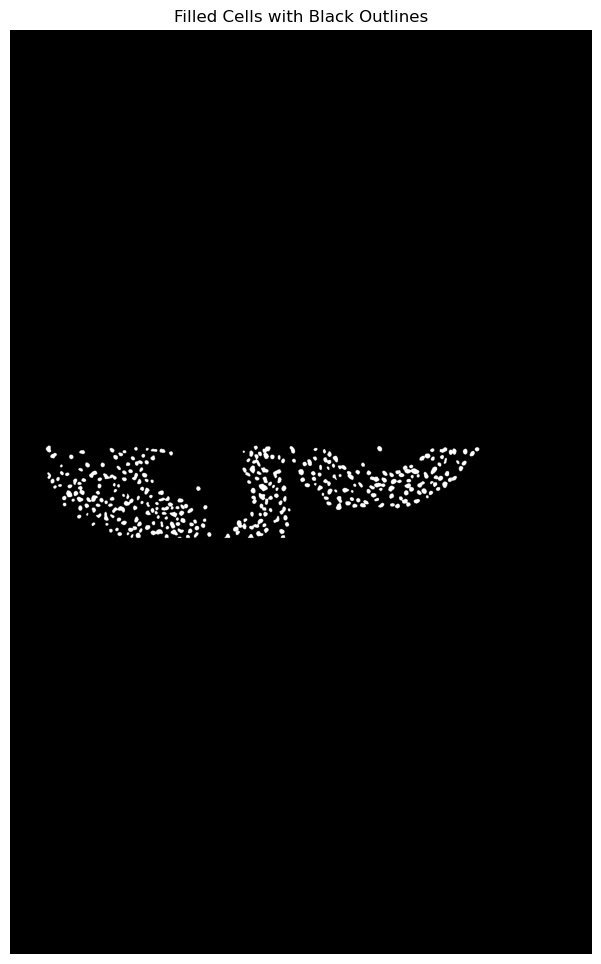

In [286]:
# Iterate over polygons and assign each one a unique label
# Create a blank canvas (e.g., 800x800)
from shapely.geometry import Polygon
from skimage.draw import polygon 


image_array = np.zeros((2478, 1560), dtype=np.uint8)

# Draw black outlines on top of the filled areas
for outline in overlap_outline_list_0:
    outline = np.array(outline, dtype=np.int32)
    rr, cc = polygon(outline[:, 1], outline[:, 0], image_array.shape)
    image_array[rr, cc] = 255  # Fill with white (255) inside each contour

# Save the result as a variable
image_array_0 = image_array

# Display the final image
plt.figure(figsize=(12, 12))
plt.imshow(image_array_0, cmap='gray')
plt.title("Filled Cells with Black Outlines")
plt.axis('off')
plt.show()




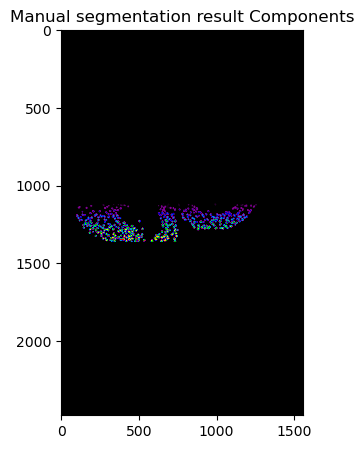

In [291]:
import cv2
# Apply connected components to label the connected regions
# It returns two values:
# num_labels: number of labels (including background)
# labels: image array where each connected component has a unique label
num_labels, labels_im = cv2.connectedComponents(image_array_0)

# Visualize the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(labels_im, cmap='nipy_spectral')
plt.title('Manual segmentation result Components')
plt.axis('on')
plt.show()


C:\Users\Alexis\AppData\Local\Temp\ipykernel_131992\2706704573.py:19: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image_array[rr, cc] = label
C:\Users\Alexis\AppData\Local\Temp\ipykernel_131992\2706704573.py:19: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image_array[rr, cc] = label
C:\Users\Alexis\AppData\Local\Temp\ipykernel_131992\2706704573.py:19: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 258 to uint8 will fail in the future.
For th

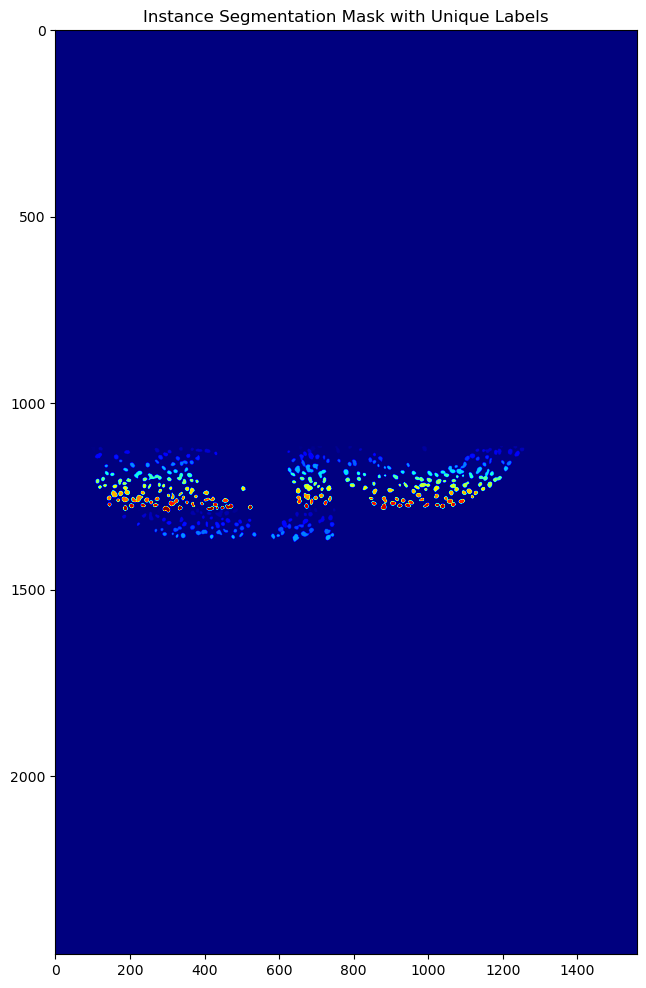

In [288]:
# Iterate over polygons and assign each one a unique label
# Create a blank canvas (e.g., 800x800)
from shapely.geometry import Polygon
from skimage.draw import polygon 
image_array = np.zeros((2478, 1560), dtype=np.uint8)


for label, poly_coords in enumerate(overlap_outline_list_1, start=1):
    # Create a Shapely polygon from the coordinates
    polygon_obj = Polygon(poly_coords)

    # Extract x and y coordinates for drawing
    x_coords, y_coords = poly_coords[:, 0], poly_coords[:, 1]

    # Convert polygon coordinates to pixel coordinates and rasterize
    rr, cc = polygon(y_coords, x_coords, shape=image_array.shape)

    # Assign the unique label to the instance in the image (label 1, 2, 3, ...)
    image_array[rr, cc] = label

# Visualize the result
plt.figure(figsize=(12, 12))
plt.imshow(image_array, cmap='jet')
plt.title('Instance Segmentation Mask with Unique Labels')
plt.axis('on')
plt.show()


In [159]:
# cell_groups = pd.DataFrame(cell_groups)
# cell_groups

In [289]:
import numpy as np
import pandas as pd
import cv2
from shapely.geometry import Polygon
from skimage.draw import polygon

def calculate_iou(mask1, mask2):
    # Calculate intersection and union
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0
    return iou


ious = []


iou_threshold = 0.4
matched_test_instances = set()  # To track test instances that have been matched
comparison_data = []

# Loop over each instance in the ground truth
for label in range(1, num_labels):  # num_labels from connectedComponents
    # Create a binary mask for the current label (instance) in the ground truth
    mask1 = (labels_im == label).astype(np.uint8)
    
    best_iou = 0  # Track the best IoU for the current ground truth instance
    best_test_label = None  # Track which test label gives the best IoU
    
    print(f"\nProcessing ground truth instance {label}...")
    
    # !!   scaled_all_polygons
    # Loop over the test set polygons (each one is already labeled in your test set)
    for test_label, poly_coords in enumerate(overlap_outline_list_1, start=1):
        if test_label in matched_test_instances:
            # Skip this test instance if it has already been matched
            continue
        
        # Create binary mask for the current test set polygon (instance)
        mask2 = np.zeros_like(mask1)
        x_coords, y_coords = poly_coords[:, 0], poly_coords[:, 1]
        rr, cc = polygon(y_coords, x_coords, shape=mask2.shape)
        mask2[rr, cc] = 1
        
        # Calculate IoU between the current ground truth instance and test set instance
        iou = calculate_iou(mask1, mask2)
        # # Print IoU to monitor progress
        # print(f"  IoU between ground truth {label} and test {test_label}: {iou:.4f}")
        
        # If IoU is above the threshold and better than the current best, record it
        if iou > iou_threshold and iou > best_iou:
            best_iou = iou
            best_test_label = test_label

    # If we found a match (IoU > 0.40), append it to the list
    if best_test_label is not None:
        print(f"  Best match for ground truth {label} is test {best_test_label} with IoU {best_iou:.4f}")
        matched_test_instances.add(best_test_label)
        ious.append(best_iou)


        # Append the comparison data
        comparison_data.append({
            'mask1': label,
            'mask2': best_test_label,
            'IoU': best_iou,

        })
        
    else:
        print(f"  No match found for ground truth {label} (IoU > {iou_threshold})")

# Save the DataFrame to a CSV file
comparison_df = pd.DataFrame(comparison_data)

# Display the first few rows of the DataFrame
print(comparison_df.head())

# Calculate mean IoU if we have any matches
if ious:
    mean_iou = np.mean(ious)

    print(f"\nMean IoU: {mean_iou:.4f}")

else:
    print("\nNo matched instances found with IoU > 0.40")




Processing ground truth instance 1...
  Best match for ground truth 1 is test 1 with IoU 0.7956

Processing ground truth instance 2...
  Best match for ground truth 2 is test 2 with IoU 0.8556

Processing ground truth instance 3...
  Best match for ground truth 3 is test 32 with IoU 0.4178

Processing ground truth instance 4...
  Best match for ground truth 4 is test 5 with IoU 0.7892

Processing ground truth instance 5...
  Best match for ground truth 5 is test 7 with IoU 0.9178

Processing ground truth instance 6...
  Best match for ground truth 6 is test 11 with IoU 0.9200

Processing ground truth instance 7...
  Best match for ground truth 7 is test 16 with IoU 0.7208

Processing ground truth instance 8...
  Best match for ground truth 8 is test 13 with IoU 0.9333

Processing ground truth instance 9...
  Best match for ground truth 9 is test 14 with IoU 0.9402

Processing ground truth instance 10...
  Best match for ground truth 10 is test 12 with IoU 0.7895

Processing ground tru

In [290]:
comparison_df

,Ground Truth Instance,Cellpose Segmentation Instance,IoU
0,1,1,0.795556
1,2,2,0.855556
2,3,32,0.417808
3,4,5,0.789189
4,5,7,0.917808
...,...,...,...
265,283,329,0.896552
266,284,331,0.762376
267,285,328,0.422131
268,286,333,0.701149


In [ ]:
overlap_region

(1116, 1362, 0, 1560)

In [ ]:
overlap_region

(1116, 1362, 0, 1560)

In [ ]:

comparison_df.to_csv('result/comparison_df_1835OD_HIL.csv', index=False)
